In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib import cm
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
df1 = df[(df['job_country'] == 'Canada') & (df['job_title_short'] == 'Data Analyst')].dropna(subset='salary_hour_avg')
df1


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
70830,Data Analyst,Junior Data Analyst - Remote (Work from Home),Anywhere,via The Elite Job,Full-time and Part-time,True,Canada,2023-11-24 00:16:07,True,False,Canada,hour,NaN,25.0,The Elite Job,"[python, r, sql, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
70869,Data Analyst,Remote Data Analyst Job at Online Retailer - A...,Anywhere,via Work Wise Careers,Full-time,True,Canada,2023-11-23 00:14:40,True,False,Canada,hour,NaN,26.0,Work Wise Careers/,"[sql, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ..."
73362,Data Analyst,Online Data Analyst (Part-time WFH),Anywhere,via The Elite Job,Full-time and Part-time,True,Canada,2023-12-01 00:13:29,True,False,Canada,hour,NaN,25.0,The Elite Job,"[python, r, sql]","{'programming': ['python', 'r', 'sql']}"
303133,Data Analyst,Junior Data Analyst,"Edmonton, AB, Canada",via Get.It,Part-time,False,Canada,2023-07-15 17:09:14,False,False,Canada,hour,NaN,20.0,Trans-Tach,"[sql, python, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
306155,Data Analyst,Data Architect,Canada,via LinkedIn,Contractor,False,Canada,2023-12-15 17:10:52,True,False,Canada,hour,NaN,70.0,MethodHub,"[sql, python, snowflake, azure, visio]","{'analyst_tools': ['visio'], 'cloud': ['snowfl..."
320046,Data Analyst,Client Data Analyst (CDM&PR),Anywhere,via LinkedIn,Full-time,True,Canada,2023-12-28 17:33:26,False,False,Canada,hour,NaN,37.5,Mehra Wealth Management - CIBC Private Wealth,"[go, express]","{'programming': ['go'], 'webframeworks': ['exp..."
334412,Data Analyst,Full-time Data Entry Analyst – Entry level (Re...,Anywhere,via The Elite Job,Full-time and Part-time,True,Canada,2023-12-23 23:33:44,False,False,Canada,hour,NaN,25.0,The Elite Job,[excel],{'analyst_tools': ['excel']}
422746,Data Analyst,Data Analyst,"Belleville, ON, Canada",via Get.It,Part-time,False,Canada,2023-11-25 16:09:11,False,False,Canada,hour,NaN,35.0,Trans-Tach,None,None
451270,Data Analyst,Data Analyst,"Fort St John, BC, Canada",via Get.It,Part-time,False,Canada,2023-11-30 14:13:32,False,False,Canada,hour,NaN,34.0,Trans-Tach,[sql],{'programming': ['sql']}
503994,Data Analyst,Data Analyst,"St Thomas, ON, Canada",via Get.It,Part-time,False,Canada,2023-11-16 11:13:03,False,False,Canada,hour,NaN,35.0,Trans-Tach,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."


C:\Users\david\AppData\Local\Temp\ipykernel_26676\1750546158.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(job_list, labels=job_titles)


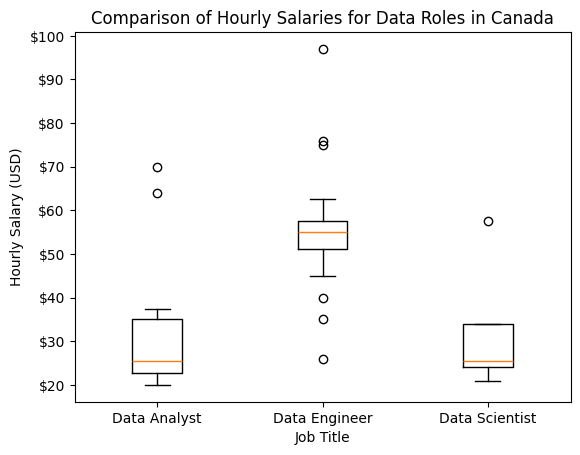

In [28]:
# Filter out data
df_Canada = df[df['job_country'] == 'Canada'].dropna(subset=['salary_hour_avg'])
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
job_list = [df_Canada[df_Canada['job_title_short'] == job]['salary_hour_avg'] for job in job_titles]

# Plot charts
fig, ax = plt.subplots()
ax.boxplot(job_list, labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()